In [2]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [5]:
super = pd.read_csv("Super C19 G.csv")
super = super.drop('Unnamed: 0', axis = 1)

#Creating cases and deaths columns to later get accruate new cases and deaths
for i in range(3142):
    column_data = 0

super.insert(4, "2020-01-21,1cases", column_data)
super.insert(1096, "2020-01-21,2deaths", column_data)

super

,countyFIPS,County Name,State,StateFIPS,"2020-01-21,1cases","2020-01-22,1cases","2020-01-23,1cases","2020-01-24,1cases","2020-01-25,1cases","2020-01-26,1cases",...,"2023-01-08,2deaths","2023-01-09,2deaths","2023-01-10,2deaths","2023-01-11,2deaths","2023-01-12,2deaths","2023-01-13,2deaths","2023-01-14,2deaths","2023-01-15,2deaths","2023-01-16,2deaths",population
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,230,230,230,230,230,230,230,230,230,55869
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,719,719,719,719,721,721,721,721,721,223234
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,24686
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,108,108,108,108,108,108,108,108,108,22394
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,260,260,260,260,261,261,261,261,261,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,136,136,136,136,136,136,136,136,136,42343
3138,56039,Teton County,WY,56,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,23464
3139,56041,Uinta County,WY,56,0,0,0,0,0,0,...,43,43,43,43,43,43,43,43,43,20226
3140,56043,Washakie County,WY,56,0,0,0,0,0,0,...,47,47,47,47,47,47,47,47,47,7805


In [6]:
USData = super.drop(super.columns[[0, 1, 2, 3, -1]], axis=1).sum()
USData

2020-01-21,1cases          0
2020-01-22,1cases        723
2020-01-23,1cases        734
2020-01-24,1cases        741
2020-01-25,1cases        751
                       ...  
2023-01-12,2deaths    996209
2023-01-13,2deaths    996314
2023-01-14,2deaths    996329
2023-01-15,2deaths    996329
2023-01-16,2deaths    996330
Length: 2204, dtype: int64

In [7]:
US_Cases = []
US_Deaths = []
for i in range(len(USData.keys())):
    if str(USData.keys()[i][11:13]) != "2d":
        US_Cases.append(USData[i])
    else:
        US_Deaths.append(USData[i])

# print(US_Cases)
# print(US_Deaths)

#Getting the new cases and deaths
NewUS_Cases = []
for i in reversed(range(len(US_Cases))):
    UNC = US_Cases[i] - US_Cases[i - 1]
    if (UNC < 0):
        UNC = 0
    NewUS_Cases.insert(0, UNC)

NewUS_Deaths = []
for i in reversed(range(len(US_Deaths))):
    UND = US_Deaths[i] - US_Deaths[i - 1]
    if (UND < 0):
        UND = 0
    NewUS_Deaths.insert(0, UND)

NewUS_Cases.pop(0)
NewUS_Deaths.pop(0)

0

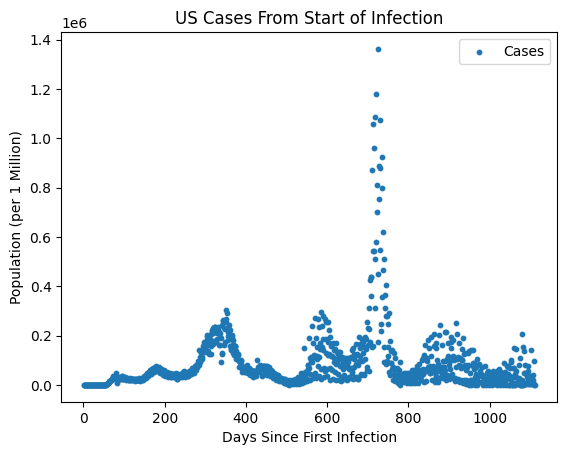

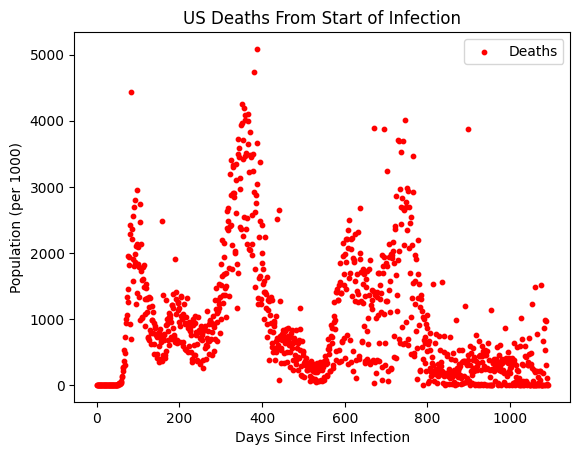

In [8]:
case_data = []
for i in range(len(NewUS_Cases)):
    i += 1
    day_data = i
    case_data.append(day_data)

death_data = []
for i in range(len(NewUS_Deaths)):
    i += 1
    day_data = i
    death_data.append(day_data)

NewUS_Cases = np.array(NewUS_Cases)
NewUS_Deaths = np.array(NewUS_Deaths)
case_data = np.array(case_data)
death_data = np.array(death_data)

plt.scatter(case_data, NewUS_Cases, label='Cases', s = 10)
plt.legend()
plt.title("US Cases From Start of Infection")
plt.xlabel("Days Since First Infection")
plt.ylabel("Population (per 1 Million)")
plt.show()

plt.scatter(death_data, NewUS_Deaths, label='Deaths', c ="red", s = 10)
plt.legend()
plt.title("US Deaths From Start of Infection")
plt.xlabel("Days Since First Infection")
plt.ylabel("Population (per 1000)")
plt.show()

Linear Regression Models

Text(0.5, 1.0, 'U.S. Cases Mean Squared Error: 1.63e+10')

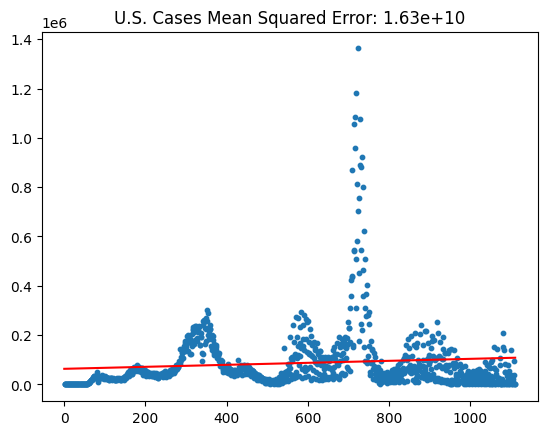

In [9]:
xCases = case_data.reshape((-1, 1))
yCases = NewUS_Cases

model = LinearRegression().fit(xCases, yCases)
y_pred = model.predict(xCases)
x_test = np.linspace(0, 1111, 1111)[:, None]

plt.scatter(xCases.ravel(), yCases, s = 10)
plt.plot(x_test.ravel(), y_pred, c ="red")
plt.title("U.S. Cases Mean Squared Error: {0:.3g}".format(mean_squared_error(model.predict(xCases), yCases)))

Text(0.5, 1.0, 'U.S. Deaths Mean Squared Error: 8.1e+05')

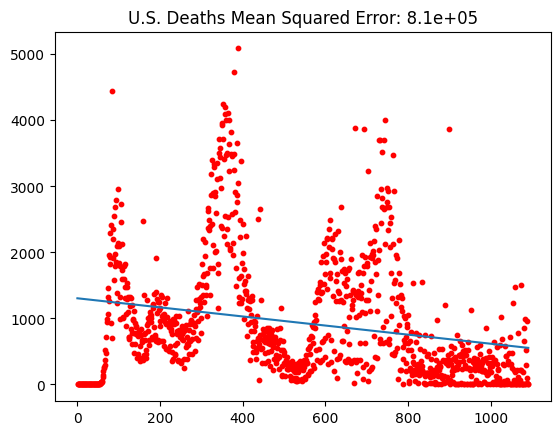

In [10]:
xDeaths = death_data.reshape((-1, 1))
yDeaths = NewUS_Deaths

model = LinearRegression().fit(xDeaths, yDeaths)
y_pred = model.predict(xDeaths)
x_test = np.linspace(0, 1091, 1091)[:, None]

plt.scatter(xDeaths.ravel(), yDeaths, c ="red", s = 10)
plt.plot(x_test.ravel(), y_pred)
plt.title("U.S. Deaths Mean Squared Error: {0:.3g}".format(mean_squared_error(model.predict(xDeaths), yDeaths)))

Non-Linear (Polynomial) Regression Models

In [11]:
cases_x_values = []
for i in range(1111):
    cases_x_values.append(i)
cases_x_values = np.array(cases_x_values)

deaths_x_values = []
for i in range(1111):
    deaths_x_values.append(i)
deaths_x_values = np.array(deaths_x_values)

In [12]:
X_cases_new = pd.DataFrame({'Day': [0, xCases.max()]})
X_deaths_new = pd.DataFrame({'Day': [0, xDeaths.max()]})

In [13]:
import statsmodels.formula.api as smf

yCases
US_new_cases_df = pd.DataFrame(yCases, columns=['Cases'])
US_new_cases_df['Day'] = US_new_cases_df.index

Cases_lm_poly_1 = smf.ols(formula='Cases ~ 1 + Day', data=US_new_cases_df).fit()
Cases_lm_poly_2 = smf.ols(formula='Cases ~ 1 + Day + I(Day ** 2.0)', data=US_new_cases_df).fit()
Cases_lm_poly_3 = smf.ols(formula='Cases ~ 1 + Day + I(Day ** 2.0) + I(Day ** 3.0)', data=US_new_cases_df).fit()

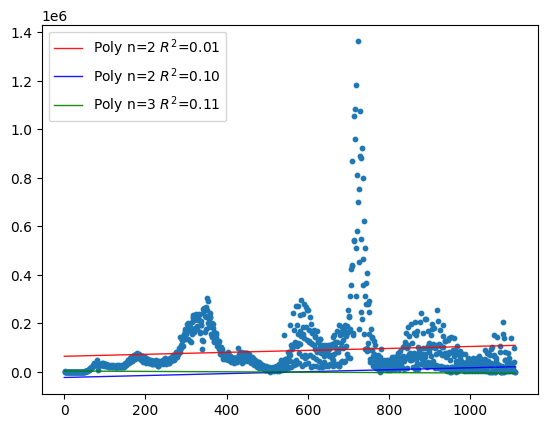

In [14]:
model = LinearRegression().fit(xCases, yCases)
y_pred = model.predict(xCases)
x_test = np.linspace(0, 1111, 1111)[:, None]

plt.scatter(xCases.ravel(), yCases, s = 10)
plt.plot(X_cases_new, Cases_lm_poly_1.predict(X_cases_new), c='red', linewidth=1, alpha=0.9, label='Poly n=2 $R^2$=%.2f' % Cases_lm_poly_1.rsquared)
plt.plot(X_cases_new, Cases_lm_poly_2.predict(X_cases_new), c='blue', linewidth=1, alpha=0.9, label='Poly n=2 $R^2$=%.2f' % Cases_lm_poly_2.rsquared)
plt.plot(X_cases_new, Cases_lm_poly_3.predict(X_cases_new), c='green', linewidth=1, alpha=0.9, label='Poly n=3 $R^2$=%.2f' % Cases_lm_poly_3.rsquared)
plt.legend()
plt.show()

In [16]:
yDeaths
US_new_deaths_df = pd.DataFrame(yDeaths, columns=['Deaths'])
US_new_deaths_df['Day'] = US_new_deaths_df.index

Deaths_lm_poly_1 = smf.ols(formula='Deaths ~ 1 + Day', data=US_new_deaths_df).fit()
Deaths_lm_poly_2 = smf.ols(formula='Deaths ~ 1 + Day + I(Day ** 2.0)', data=US_new_deaths_df).fit()
Deaths_lm_poly_3 = smf.ols(formula='Deaths ~ 1 + Day + I(Day ** 2.0) + I(Day ** 3.0)', data=US_new_deaths_df).fit()

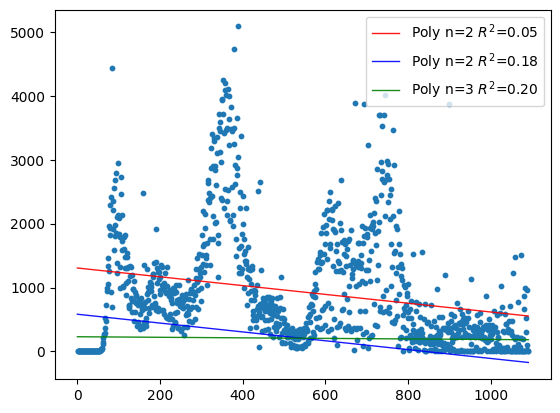

In [19]:
model = LinearRegression().fit(xDeaths, yDeaths)
y_pred = model.predict(xDeaths)
x_test = np.linspace(0, 1091, 1091)[:, None]

plt.scatter(xDeaths.ravel(), yDeaths, s = 10)
plt.plot(X_deaths_new, Deaths_lm_poly_1.predict(X_deaths_new), c='red', linewidth=1, alpha=0.9, label='Poly n=2 $R^2$=%.2f' % Deaths_lm_poly_1.rsquared)
plt.plot(X_deaths_new, Deaths_lm_poly_2.predict(X_deaths_new), c='blue', linewidth=1, alpha=0.9, label='Poly n=2 $R^2$=%.2f' % Deaths_lm_poly_2.rsquared)
plt.plot(X_deaths_new, Deaths_lm_poly_3.predict(X_deaths_new), c='green', linewidth=1, alpha=0.9, label='Poly n=3 $R^2$=%.2f' % Deaths_lm_poly_3.rsquared)
plt.legend()
plt.show()